In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [496]:
dtrain = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')

In [497]:
print("Training data shape:", dtrain.shape)
dtrain.head()


Training data shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [498]:
print("Test data shape:",dtest.shape)
dtest.head()

Test data shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Understanding & Handling Missing Values

In [499]:
dtrain['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [500]:
train = dtrain.copy()
test = dtest.copy()

#### Exploratory Analysis

### Hyphothesis 

1. Is salary depending variable for decision making?
2. Is Credit history help to make decision?
3. Is decision depending on Loan Amount?
4. Is Loan Amount Term variable influence decision? 
5. Is Household income influence decision?

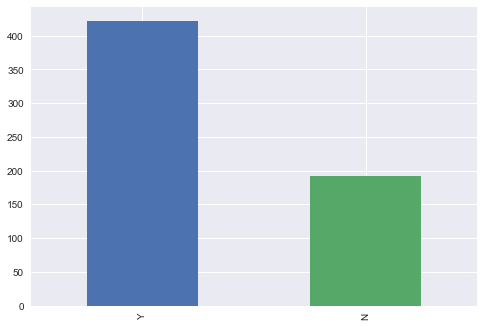

In [501]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

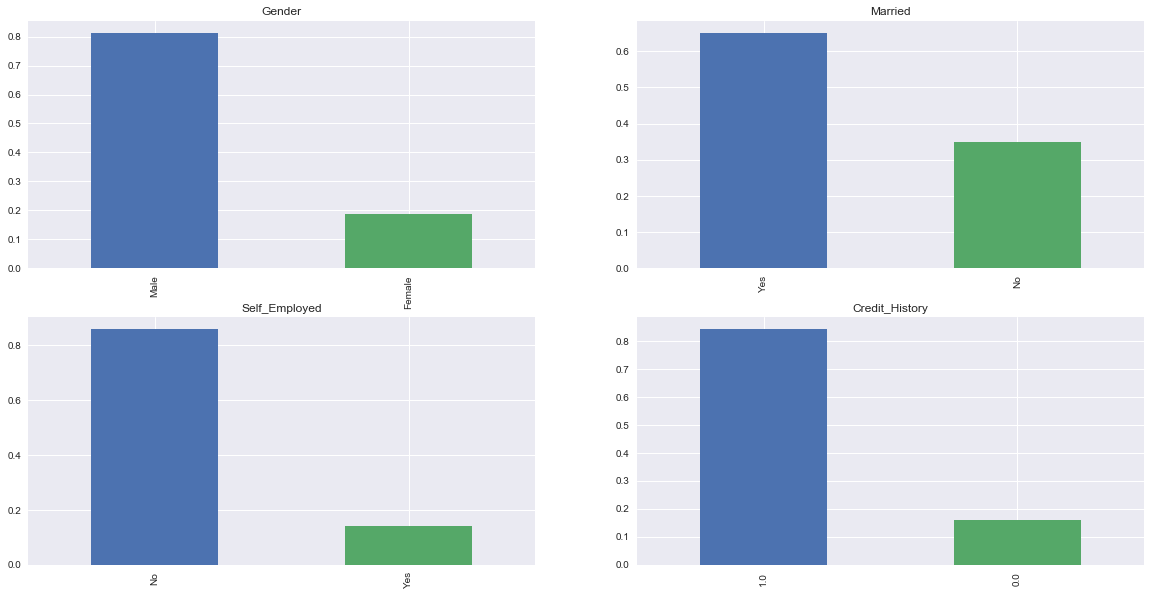

In [502]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()


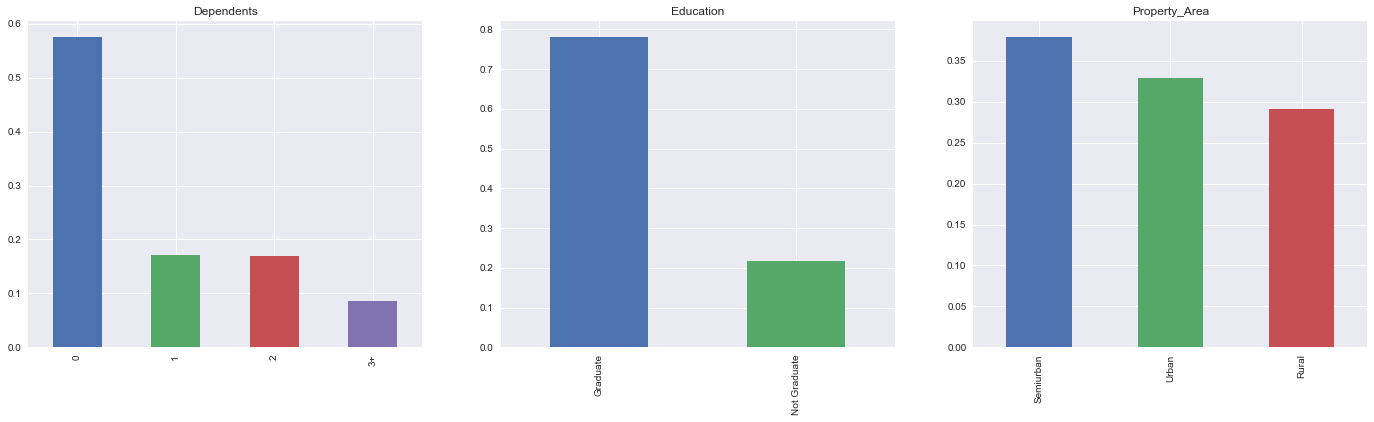

In [503]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

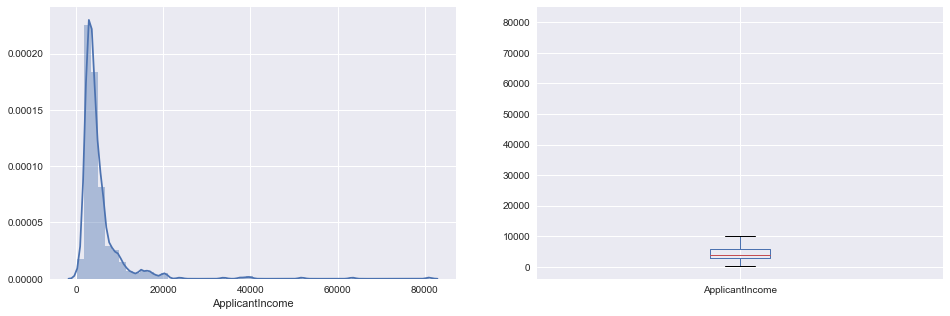

In [504]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Application income seems not normal distribute, data more toward left side.

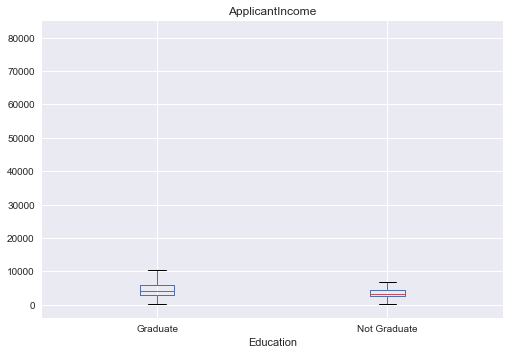

In [505]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")
plt.show()

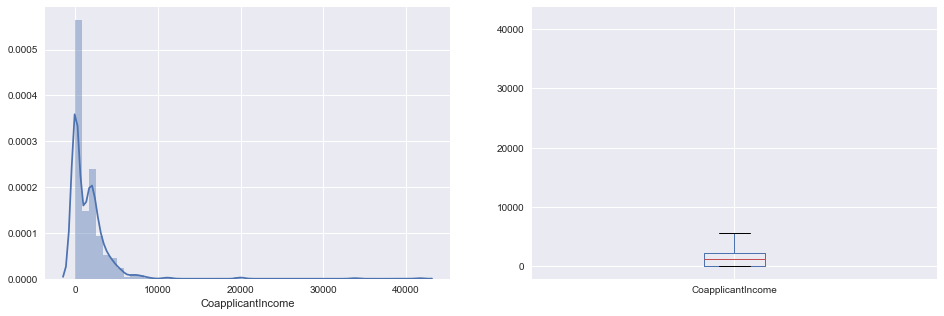

In [506]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It seems data is normally distribute same as Application Income

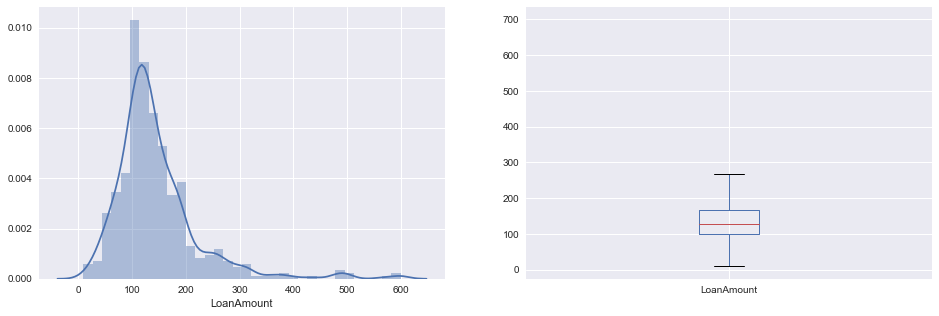

In [507]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


Lets try to test the above mentioned hypotheses using bivariate analysis



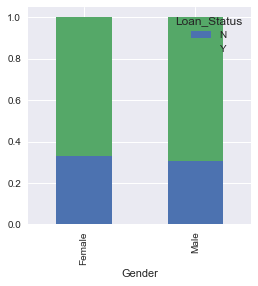

In [508]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

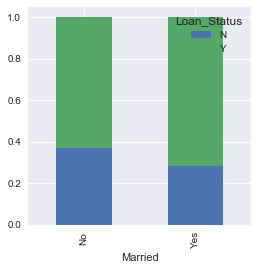

In [509]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

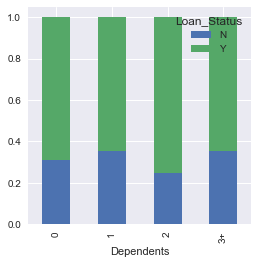

In [510]:
dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

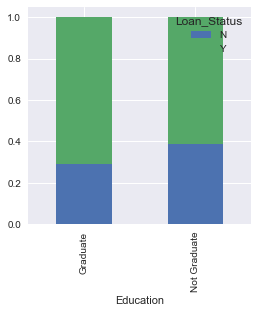

In [511]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

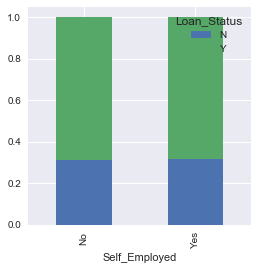

In [512]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

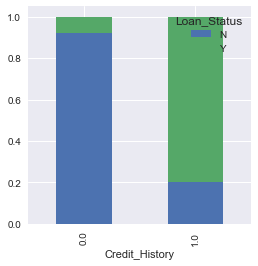

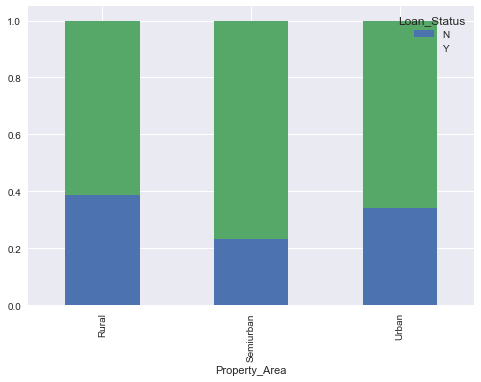

In [513]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

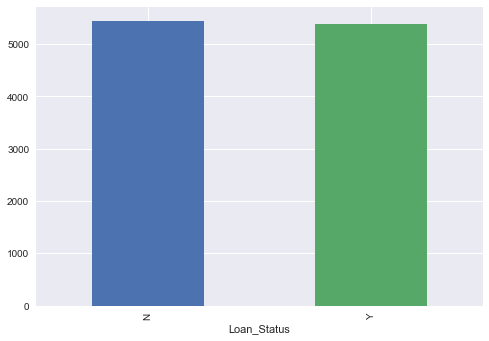

In [514]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

In [515]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

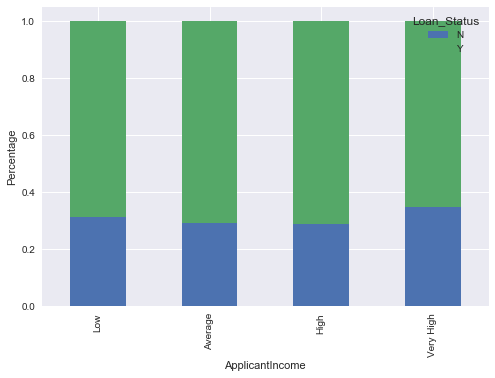

In [516]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

In [517]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

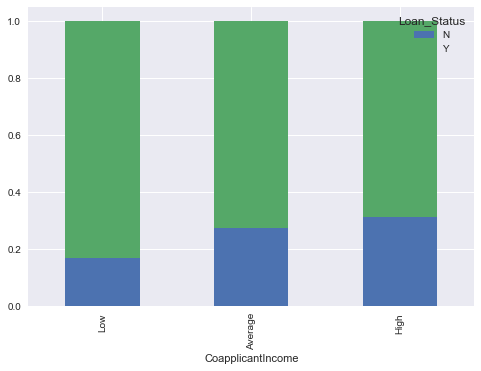

In [518]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
plt.show()


In [519]:
train['FamilyIncome'] = train['ApplicantIncome']+train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,FamilyIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0


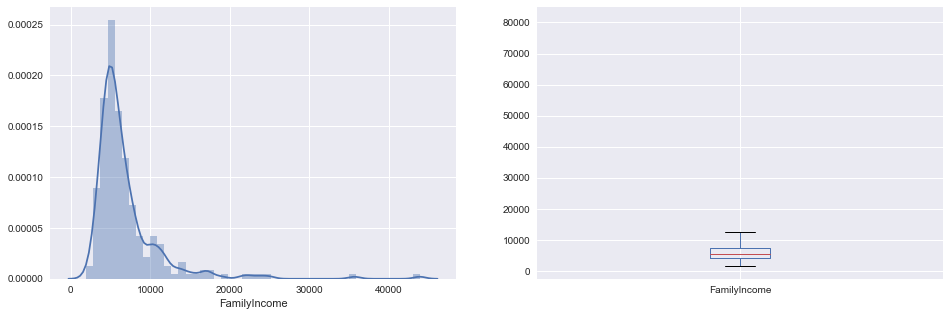

In [520]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['FamilyIncome']);

plt.subplot(122)
train['FamilyIncome'].plot.box(figsize=(16,5))

plt.show()

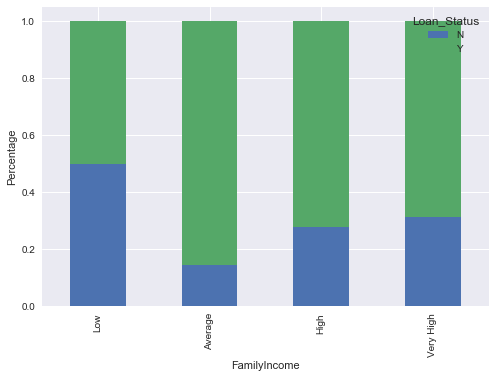

In [521]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Family_Income_bin']=pd.cut(df['FamilyIncome'],bins,labels=group)

Family_Income_bin=pd.crosstab(train['Family_Income_bin'],train['Loan_Status'])
Family_Income_bin.div(Family_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('FamilyIncome')
plt.ylabel('Percentage')
plt.show()

- Low Family income get lesser chance to get loan approval.

In [522]:
bins = [0,100,200,700]
group=['Low','Average','Hight']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

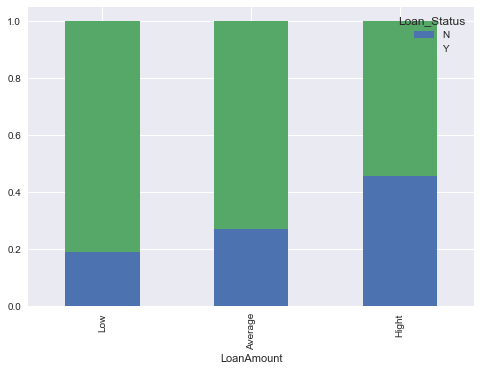

In [523]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount")
plt.show()

- High Amount get slightly less chance to get Loan

In [524]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Family_Income_bin', 'FamilyIncome'], axis=1)


In [525]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)


In [526]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


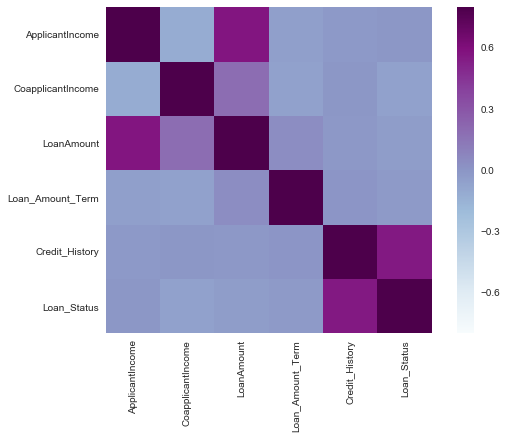

In [527]:
plt.show()

- Strong correlated (LoanAmount and ApplicantIncome) & (CreditHistory and LoanStatus)


In [528]:
# Function to count missing values
def missing_value_table(df):
    mis_val = df.isnull().sum()

    mis_per = 100 * df.isnull().sum() / len(df)
   
    mis_table = pd.concat([mis_val,mis_per],axis=1)

    rename_tbl = mis_table.rename(
       columns =  {0:'Missing Values', 1:"% of Total Values"}
    )
    rename_tbl = rename_tbl[rename_tbl.iloc[:,1]!=0].sort_values("% of Total Values", ascending=False).round(1)
    print("Columns:",df.shape)
    print("Missing columns:",rename_tbl.shape)
    return rename_tbl
    
    

In [529]:
missing_values = missing_value_table(train)
missing_values.head(20)

Columns: (614, 13)
Missing columns: (7, 2)


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [530]:
missing_values = missing_value_table(test)
missing_values.head(20)

Columns: (367, 12)
Missing columns: (6, 2)


,Missing Values,% of Total Values
Credit_History,29,7.9
Self_Employed,23,6.3
Gender,11,3.0
Dependents,10,2.7
Loan_Amount_Term,6,1.6
LoanAmount,5,1.4


- Numerical Variables imputation using mean or media
- Categorical Variables imputation using mode

In [532]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [533]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Repeated Loan Amount Term is 360 so we will replace the missing value with this.

In [534]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [535]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [536]:
missing_values = missing_value_table(train)
missing_values

Columns: (614, 13)
Missing columns: (0, 2)


,Missing Values,% of Total Values


In [537]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


Outliers is significant affect mean,median and standard deviation also distribution. 
Loan amount has longer left and right tail, it is called skewness. One way to remove skewness is log transformation which is not affect smaller value but reduce larger values and we get normal distribution.

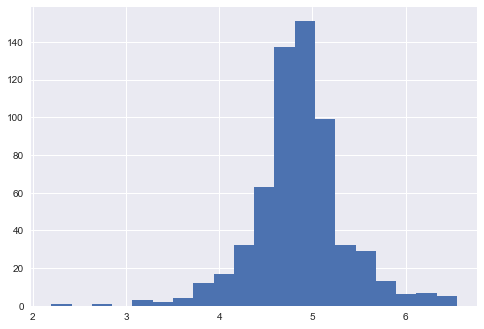

In [538]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()

- It seems closer to normal distribution

In [539]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [540]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [541]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status


In [542]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [543]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [544]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [545]:
pred_cv = model.predict(x_cv)


In [546]:
accuracy_score(y_cv,pred_cv)


0.7891891891891892

In [547]:
pred_test = model.predict(test)


In [548]:
submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")


In [549]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=dtest['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')


- To check unseen data in our model we will do cross validation like k-fold cross validation, Leave one out cross validation, Stratified k-fold cross validation
- We will use Stratified k-fold cross validation, it rearranging the data so as to ensure that each fold has good representative of the whole data
- It is better approach for bias and variance

In [550]:
from sklearn.model_selection import StratifiedKFold


In [551]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


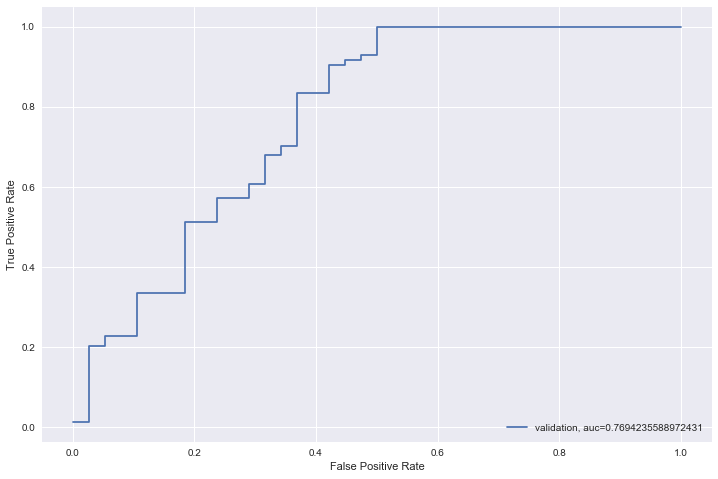

In [552]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Feature Engineering

In [553]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

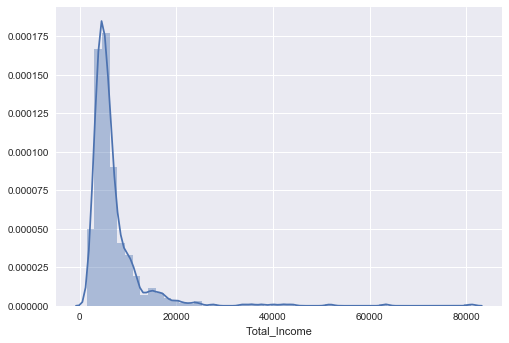

In [554]:
sns.distplot(train['Total_Income'])
plt.show()

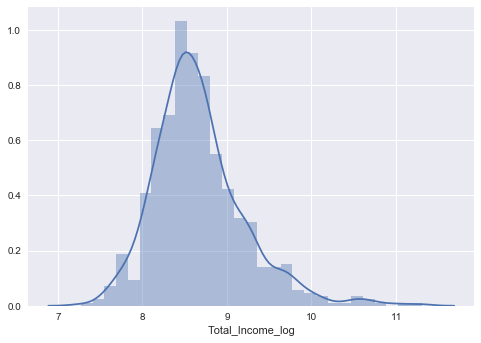

In [555]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
plt.show()
test['Total_Income_log'] = np.log(test['Total_Income'])

In [556]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

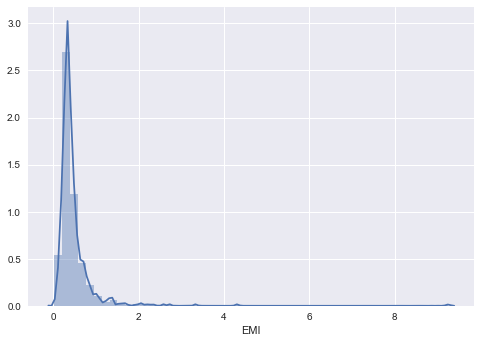

In [557]:
sns.distplot(train['EMI'])
plt.show()

In [558]:
train['Balance Income']=train['Total_Income'] - (train['EMI']*1000) #Make the equal units
test['Balance Income']=test['Total_Income'] - (test['EMI']*1000) 


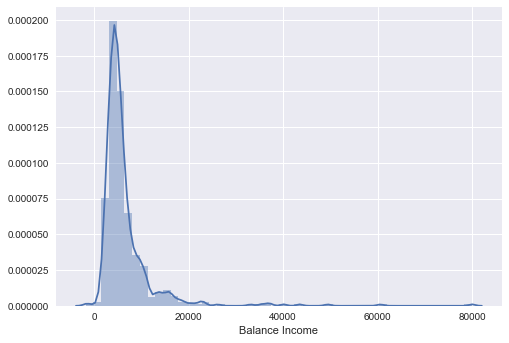

In [559]:
sns.distplot(train['Balance Income'])
plt.show()

In [665]:
train['Debt_Income_Ratio'] = train['Total_Income'] / train['LoanAmount']
test['Debt_Income_Ratio'] = test['Total_Income'] / test['LoanAmount']

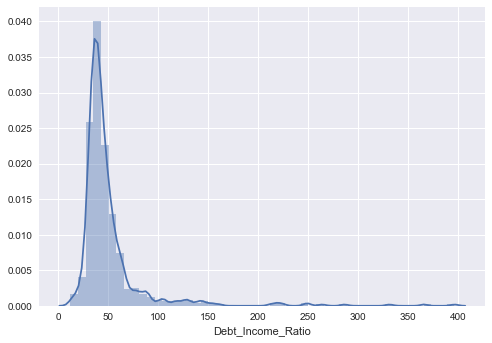

In [666]:
sns.distplot(train['Debt_Income_Ratio'])
plt.show()

In [667]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income,Property_Loan_Mean,Debt_Income_Ratio
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,0,1,5849.0,8.674026,0.355556,5493.444444,141.425743,45.695312
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,0,6091.0,8.714568,0.355556,5735.444444,151.446927,47.585938
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,3000.0,8.006368,0.183333,2816.666667,141.425743,45.454545
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,1,4941.0,8.505323,0.333333,4607.666667,141.425743,41.175000
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,0,1,6000.0,8.699515,0.391667,5608.333333,141.425743,42.553191


In [568]:
train[['LoanAmount','Property_Area_Urban']]

,LoanAmount,Property_Area_Urban
0,128.0,1
1,128.0,0
2,66.0,1
3,120.0,1
4,141.0,1
5,267.0,1
6,95.0,1
7,158.0,0
8,168.0,1
9,349.0,0


In [668]:
train['Property_Loan_Mean'] = 0

train['Property_Loan_Mean'][train['Property_Area_Urban']==1] = train.LoanAmount[train['Property_Area_Urban']==1].mean()
train['Property_Loan_Mean'][train['Property_Area_Semiurban']==1] = train.LoanAmount[train['Property_Area_Semiurban']==1].mean()
train['Property_Loan_Mean'][train['Property_Area_Rural']==1] = train.LoanAmount[train['Property_Area_Rural']==1].mean()


test['Property_Loan_Mean'] = 0
test['Property_Loan_Mean'][test['Property_Area_Urban']==1] = test.LoanAmount[test['Property_Area_Urban']==1].mean()
test['Property_Loan_Mean'][test['Property_Area_Semiurban']==1] = test.LoanAmount[test['Property_Area_Semiurban']==1].mean()
test['Property_Loan_Mean'][test['Property_Area_Rural']==1] = test.LoanAmount[test['Property_Area_Rural']==1].mean()
#test['Urban_Loan_Mean'] [test['Property_Area_Urban']!=1]= 0

train[['Property_Loan_Mean','Property_Area_Urban','Property_Area_Semiurban','Property_Area_Rural']]




,Property_Loan_Mean,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural
0,141.425743,1,0,0
1,151.446927,0,0,1
2,141.425743,1,0,0
3,141.425743,1,0,0
4,141.425743,1,0,0
5,141.425743,1,0,0
6,141.425743,1,0,0
7,145.128755,0,1,0
8,141.425743,1,0,0
9,145.128755,0,1,0


In [706]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [708]:
train['Debt_Income_Ratio'] = feature_scaling(train['Debt_Income_Ratio'])
test['Debt_Income_Ratio'] = feature_scaling(test['Debt_Income_Ratio'])
train['Balance Income'] = feature_scaling(train['Balance Income'])
test['Balance Income'] = feature_scaling(test['Balance Income'])
train['Total_Income'] = feature_scaling(train['Total_Income'])
test['Total_Income'] = feature_scaling(test['Total_Income'])
train['Property_Loan_Mean'] = feature_scaling(train['Property_Loan_Mean'])
test['Property_Loan_Mean'] = feature_scaling(test['Property_Loan_Mean'])
train.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income,Property_Loan_Mean,Debt_Income_Ratio
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,0,1,0.055394,8.674026,0.355556,0.088805,0.0,0.087450
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,0,0.058435,8.714568,0.355556,0.091765,1.0,0.092370
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0.019583,8.006368,0.183333,0.056069,0.0,0.086824
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,1,0.043980,8.505323,0.333333,0.077973,0.0,0.075687
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,0,1,0.057292,8.699515,0.391667,0.090211,0.0,0.079274


In [709]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income', 'Total_Income_log', 'EMI',
       'Balance Income', 'Property_Loan_Mean', 'Debt_Income_Ratio'],
      dtype='object')

In [710]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income',
       'Property_Loan_Mean', 'Debt_Income_Ratio'],
      dtype='object')

In [711]:
#train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
#test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
X = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status','Balance Income'],axis=1)
Xtest = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Balance Income'],axis=1)
#X = train.drop('Loan_Status',1)
y = train.Loan_Status
# Save target variable in separate dataset


In [712]:
X.columns


Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Property_Loan_Mean',
       'Debt_Income_Ratio'],
      dtype='object')

In [713]:
Xtest.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Property_Loan_Mean',
       'Debt_Income_Ratio'],
      dtype='object')

In [714]:
from sklearn import tree


In [715]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(Xtest)



1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.75

3 of kfold 5
accuracy_score 0.6475409836065574

4 of kfold 5
accuracy_score 0.6557377049180327

5 of kfold 5
accuracy_score 0.6885245901639344


With the decision tree : Mean validation accuracy is 0.69

In [716]:
from sklearn.ensemble import RandomForestClassifier

In [717]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(Xtest)


1 of kfold 5
accuracy_score 0.7419354838709677

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8278688524590164


With RandomForestClassifier mean validation accuracy is 0.76

- Tunning Hyperparameter using Grid Search

In [718]:
from sklearn.model_selection import GridSearchCV


In [719]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}


In [720]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [721]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

In [722]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [723]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=81, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [724]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [725]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=81, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(Xtest)
pred2 = model.predict_proba(Xtest)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


In [726]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=dtest['Loan_ID'] # filling Loan_ID with test Loan_ID


In [727]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [728]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest_improve.csv')


In [729]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))


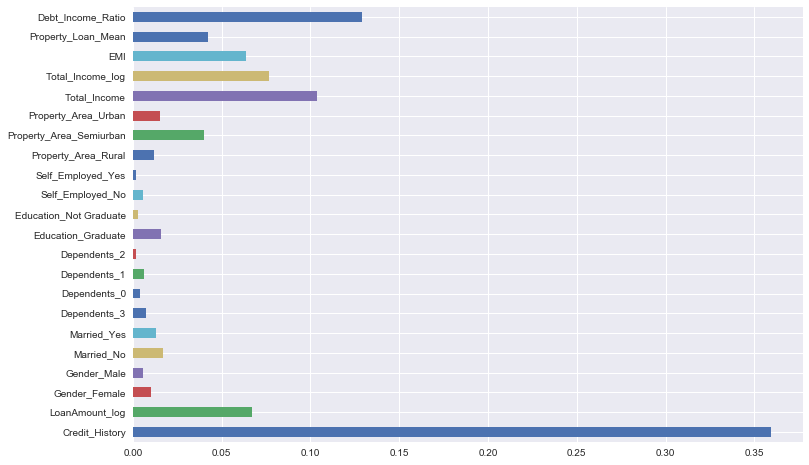

In [730]:
plt.show()

In [731]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income,Property_Loan_Mean,Debt_Income_Ratio
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,0,1,0.055394,8.674026,0.355556,0.088805,0.0,0.087450
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,0,0.058435,8.714568,0.355556,0.091765,1.0,0.092370
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0.019583,8.006368,0.183333,0.056069,0.0,0.086824
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,1,0.043980,8.505323,0.333333,0.077973,0.0,0.075687
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,0,1,0.057292,8.699515,0.391667,0.090211,0.0,0.079274


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income,Property_Loan_Mean,Debt_Income_Ratio
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,0,1,0.055394,8.674026,0.355556,0.088805,141.425743,0.087450
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,0,0.058435,8.714568,0.355556,0.091765,151.446927,0.092370
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0.019583,8.006368,0.183333,0.056069,141.425743,0.086824
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,1,0.043980,8.505323,0.333333,0.077973,141.425743,0.075687
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,0,1,0.057292,8.699515,0.391667,0.090211,141.425743,0.079274


In [732]:
X = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status','Balance Income','Total_Income_log', 'Property_Area_Urban','Self_Employed_Yes','Self_Employed_No', 'Education_Not Graduate','Dependents_0'
,'Dependents_3','Married_Yes', 'Gender_Male','Gender_Female'],axis=1)
Xtest = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Balance Income','Total_Income_log', 'Property_Area_Urban','Self_Employed_Yes','Self_Employed_No', 'Education_Not Graduate','Dependents_0'
,'Dependents_3','Married_Yes', 'Gender_Male','Gender_Female'],axis=1)
#X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset


In [484]:
from xgboost import XGBClassifier

In [733]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(Xtest)
pred3=model.predict_proba(Xtest)[:,1]



1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7950819672131147

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8524590163934426


In [734]:
grid_search = GridSearchCV(XGBClassifier(random_state=1),paramgrid)

In [735]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

In [736]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [738]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=181,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [739]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=181,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(Xtest)
pred2 = model.predict_proba(Xtest)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.8114754098360656

5 of kfold 5
accuracy_score 0.8524590163934426


In [740]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=dtest['Loan_ID'] # filling Loan_ID with test Loan_ID


In [741]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [742]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('ImproveXGBoost_1.csv')


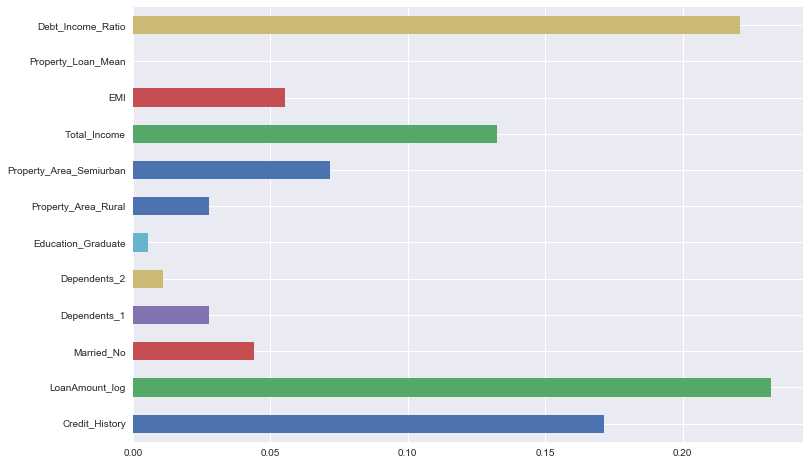

In [743]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

In [ ]:
'Total_Income_log', 'Property_Area_Urban','Self_Employed_Yes','Self_Employed_No', 'Education_Not Graduate','Dependents_0'
,'Dependents_3','Married_Yes', 'Gender_Male','Gender_Female'